## Lab 4

## Import libs and connect to database

In [34]:
import pandas
import configparser
import psycopg2

## Connect to Database

In [35]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [36]:
cur=conn.cursor()

## Question 1

In [37]:
sq1_q1 = """
        select * from gp11.student
        """

In [38]:
df_student=pandas.read_sql_query('select * from gp11.student',conn)
df_student[:]

,s_email,s_name,major
0,sheparj@dukes.jmu.edu,Jane Shepard,Intelligence Analysis
1,wreu@dukes.jmu.edu,Urdnot Wrex,Computer Science
2,vakariag@dukes.jmu.edu,Garrus Vakarian,Intelligence Analysis
3,tsonl@dukes.jmu.edu,Liara T'Soni,Geographic Science
4,alenkk@dukes.jmu.edu,Kaiden Alenko,Intelligence Anlaysis
5,kriot@dukes.jmu.edu,Thane Krios,Computer Information Systems
6,gotk@dukes.jmu.edu,Kasumi Goto,Intelligence Analysis
7,lawsom@dukes.jmu.edu,Miranda Lawson,Computer Science
8,solum@dukes.jmu.edu,Mordin Solus,Geographic Science
9,tayloj@dukes.jmu.edu,Jacob Taylor,Computer Infromation Systems


## Question 2

In [39]:
sq1_q2 = """
        select gp11.professor.p_name,
        gp11.course.c_name
        from gp11.professor
        inner join gp11.course
        on gp11.professor.p_email = gp11.course.p_email
        """

In [40]:
df=pandas.read_sql_query(sq1_q2,conn)
df[:]

,p_name,c_name
0,Dr. Noel Hendrickson,Introduction to Intelligence Analysis
1,Dr. Timothy Walton,Hypothesis Testing
2,Dr. Noel Hendrickson,COUNTERFACTUAL REASONING
3,Dr. Xuebin Wei,"Data Mining, Modeling and Knowledge Discovery"
4,Dr. John Robinson,"ETHICS, LAW AND INTELLIGENCE ANALYSIS"
5,Dr. Jeff Tang,INTELLIGENCE ANALYSIS CAPSTONE PROJECT PREPARA...
6,Dr. Ron Raab,AWARENESS AND UNDERSTANDING OF WMDs
7,Dr. Stephen Marrin,SEMINAR ON ISSUES IN INTELLIGENCE ANALYSIS
8,new_p,c_new_name
9,new_p,Selected Topics in Intelligence Analysis


## Question 3

In [41]:
sq1_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp11.enroll_list
        group by c_number
        order by enrolled desc
        """

<AxesSubplot:xlabel='c_number'>

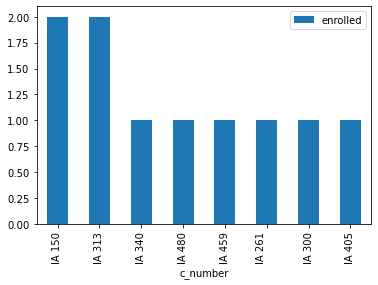

In [42]:
df=pandas.read_sql_query(sq1_q3,conn)
df.plot.bar(y='enrolled', x='c_number')

## Question 4

In [43]:
sq1_q4 = """
        select gp11.professor.p_name,
        count(gp11.course.c_name) as teaching_number
        from gp11.professor
        inner join gp11.course
        on gp11.professor.p_email = gp11.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

<AxesSubplot:xlabel='p_name'>

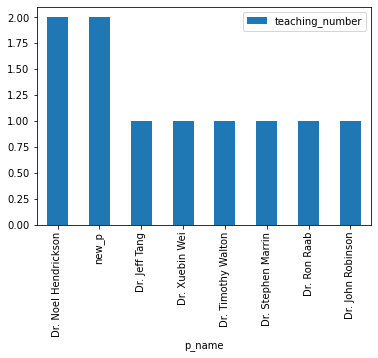

In [44]:
df = pandas.read_sql_query(sq1_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## Question 5

In [63]:
sql_q5_professor = """
        insert into gp11.professor(p_email,p_name,office)
        values('{}','{}','{}')
        """.format('new_p@jmu.edu','new_p','new_of23e')

In [64]:
cur.execute(sql_q5_professor)

In [65]:
conn.commit()

In [66]:
df = pandas.read_sql_query('select * from gp11.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Dr. Noel Hendrickson,ISAT/CS 317
1,waltontr@jmu.edu,Dr. Timothy Walton,ISAT/CS 326
2,weixx@jmu.edu,Dr. Xuebin Wei,ISAT/CS 112
3,marrinsp@jmu.edu,Dr. Stephen Marrin,EnGeo 2104
4,raabrw@jmu.edu,Dr. Ron Raab,ISAT/CS 156
5,robinsja@jmu.edu,Dr. John Robinson,ISAT/CS 127
6,tangjd@jmu.edu,Dr. Jeff Tang,ISAT/CS 368
7,new_p@jmu,new_p,new_office
8,new_p@jmu.edu,new_p,new_of23e


In [67]:
sql_q5_course = """
        insert into gp11.course(c_number,c_name,room,p_email)
        values('{}','{}','{}','{}')
        """.format('ia_new','new_c_name','online',"new_p@jmu.edu")

In [68]:
cur.execute(sql_q5_course)

In [69]:
conn.commit()

In [70]:
df = pandas.read_sql_query('select * from gp11.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA 150,Introduction to Intelligence Analysis,EnGeo 2301,hendrinx@jmu.edu
1,IA 261\n,Hypothesis Testing,ISAT/CS 0136,waltontr@jmu.edu
2,IA 313,COUNTERFACTUAL REASONING,EnGeo 1204,hendrinx@jmu.edu
3,IA 340,"Data Mining, Modeling and Knowledge Discovery",ISAT/CS 0336,weixx@jmu.edu
4,IA 405,"ETHICS, LAW AND INTELLIGENCE ANALYSIS",ISAT/CS 0150,robinsja@jmu.edu
5,IA 440\n,INTELLIGENCE ANALYSIS CAPSTONE PROJECT PREPARA...,ISAT/CS 3048,tangjd@jmu.edu
6,IA 459,AWARENESS AND UNDERSTANDING OF WMDs,EnGeo 1302,raabrw@jmu.edu
7,IA 300,SEMINAR ON ISSUES IN INTELLIGENCE ANALYSIS,ISAT/CS 0150,marrinsp@jmu.edu
8,c_new_number,c_new_name,c_new_room,new_p@jmu
9,IA 480,Selected Topics in Intelligence Analysis,ISAT/CS 0148,new_p@jmu


## Question 6

In [77]:
sql_q6_course = """
        update gp11.course
        set p_email = '{}'
        where p_email = '{}'
        """.format('new_p@jmu.edu','weixx@jmu.edu')

In [78]:
cur.execute(sql_q6_course)

In [79]:
conn.commit()

In [80]:
df = pandas.read_sql_query('select * from gp11.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA 150,Introduction to Intelligence Analysis,EnGeo 2301,hendrinx@jmu.edu
1,IA 261\n,Hypothesis Testing,ISAT/CS 0136,waltontr@jmu.edu
2,IA 313,COUNTERFACTUAL REASONING,EnGeo 1204,hendrinx@jmu.edu
3,IA 405,"ETHICS, LAW AND INTELLIGENCE ANALYSIS",ISAT/CS 0150,robinsja@jmu.edu
4,IA 440\n,INTELLIGENCE ANALYSIS CAPSTONE PROJECT PREPARA...,ISAT/CS 3048,tangjd@jmu.edu
5,IA 459,AWARENESS AND UNDERSTANDING OF WMDs,EnGeo 1302,raabrw@jmu.edu
6,IA 300,SEMINAR ON ISSUES IN INTELLIGENCE ANALYSIS,ISAT/CS 0150,marrinsp@jmu.edu
7,c_new_number,c_new_name,c_new_room,new_p@jmu
8,IA 480,Selected Topics in Intelligence Analysis,ISAT/CS 0148,new_p@jmu
9,ia_new,new_c_name,online,new_p@jmu.edu


In [76]:
conn.rollback()

## Close Connection

In [81]:
cur.close()
conn.close()